In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA & Feature Engeneering

In [2]:
data = pd.read_csv("AirlineReviews.csv")

In [3]:
# drop unwanted columns
data.drop(["Aircraft","DateFlown","DatePub","Review","Route","Title","unique_id"],axis=1,inplace=True)

In [4]:
data.head()

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,SeatComfortRating,ServiceRating,Slug,TravelType,TripVerified,ValueRating,WifiRating
0,AB Aviation,Economy Class,0,4,4,Netherlands,9.0,yes,4,5,ab-aviation,Solo Leisure,Trip Verified,3,0
1,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,no,2,2,ab-aviation,Solo Leisure,Trip Verified,2,0
2,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,no,2,1,ab-aviation,Solo Leisure,Trip Verified,2,0
3,Aerocaribbean,Economy Class,0,0,0,Denmark,8.0,yes,0,0,aerocaribbean,NaN,NaN,4,0
4,Aerocaribbean,NaN,0,0,0,UnitedKingdom,1.0,no,0,0,aerocaribbean,NaN,NaN,0,0


In [5]:
data.tail()

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,SeatComfortRating,ServiceRating,Slug,TravelType,TripVerified,ValueRating,WifiRating
129450,Wizz Air,Economy Class,0,0,0,UnitedKingdom,NaN,no,0,0,wizz-air,NaN,NaN,1,0
129451,Wizz Air,Economy Class,0,0,0,Belgium,8.0,yes,0,0,wizz-air,NaN,NaN,4,0
129452,Wizz Air,Economy Class,0,0,0,Ireland,NaN,no,0,0,wizz-air,NaN,NaN,1,0
129453,Wizz Air,Economy Class,0,0,0,CzechRepublic,5.0,yes,0,0,wizz-air,NaN,NaN,4,0
129454,Wizz Air,Economy Class,0,0,0,UnitedKingdom,1.0,no,0,0,wizz-air,NaN,NaN,1,0


In [6]:
data.shape

(129455, 15)

In [7]:
# Get the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          129455 non-null  object 
 1   CabinType            126437 non-null  object 
 2   EntertainmentRating  129455 non-null  int64  
 3   FoodRating           129455 non-null  int64  
 4   GroundServiceRating  129455 non-null  int64  
 5   OriginCountry        127777 non-null  object 
 6   OverallScore         125124 non-null  float64
 7   Recommended          129455 non-null  object 
 8   SeatComfortRating    129455 non-null  int64  
 9   ServiceRating        129455 non-null  int64  
 10  Slug                 129455 non-null  object 
 11  TravelType           91146 non-null   object 
 12  TripVerified         59508 non-null   object 
 13  ValueRating          129455 non-null  int64  
 14  WifiRating           129455 non-null  int64  
dtypes: float64(1), in

In [8]:
# Check Null VAlues
data.isnull().sum()

AirlineName                0
CabinType               3018
EntertainmentRating        0
FoodRating                 0
GroundServiceRating        0
OriginCountry           1678
OverallScore            4331
Recommended                0
SeatComfortRating          0
ServiceRating              0
Slug                       0
TravelType             38309
TripVerified           69947
ValueRating                0
WifiRating                 0
dtype: int64

In [9]:
# Check Duplicet Values
data.duplicated().sum()

19047

In [10]:
# Drop Duplicet values
data.drop_duplicates(inplace=True)

In [11]:
# fill Null Values with median and mode 
data["CabinType"] = data["CabinType"].fillna(st.mode(data["CabinType"]))
data["OverallScore"] = data["OverallScore"].fillna(np.nanmedian(data["OverallScore"]))
data["TravelType"] = data["TravelType"].fillna("Solo Leisure")

In [12]:
# drop unwanted colums
data.drop(["OriginCountry","TripVerified",'AirlineName',"Slug"],axis=1,inplace=True)

In [13]:
# saprate catigorical and numerical data 
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['CabinType', 'Recommended', 'TravelType'], dtype='object')
Index(['EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OverallScore', 'SeatComfortRating', 'ServiceRating', 'ValueRating',
       'WifiRating'],
      dtype='object')


In [14]:
# check unique values i catigorical data
for i in catigorical_features:
    print(i,data[i].unique())

CabinType ['Economy Class' 'Business Class' 'First Class' 'Premium Economy']
Recommended ['yes' 'no']
TravelType ['Solo Leisure' 'Business' 'Couple Leisure' 'Family Leisure']


In [15]:
# check  values counts i catigorical data
for i in catigorical_features:
    print(i,data[i].value_counts())
    print("*"*30)

CabinType CabinType
Economy Class      87800
Business Class     15776
Premium Economy     4565
First Class         2267
Name: count, dtype: int64
******************************
Recommended Recommended
no     62667
yes    47741
Name: count, dtype: int64
******************************
TravelType TravelType
Solo Leisure      60555
Couple Leisure    20738
Family Leisure    16280
Business          12835
Name: count, dtype: int64
******************************


In [16]:
# Get the 5 number summary of data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EntertainmentRating,110408.0,1.699243,1.778573,0.0,0.0,1.0,3.0,5.0
FoodRating,110408.0,2.163548,1.758633,0.0,1.0,2.0,4.0,5.0
GroundServiceRating,110408.0,1.784717,1.787947,0.0,0.0,1.0,3.0,5.0
OverallScore,110408.0,4.790124,3.389017,1.0,1.0,4.0,8.0,10.0
SeatComfortRating,110408.0,2.663412,1.562811,0.0,1.0,3.0,4.0,5.0
ServiceRating,110408.0,2.905251,1.713711,0.0,1.0,3.0,5.0,5.0
ValueRating,110408.0,2.795341,1.590876,0.0,1.0,3.0,4.0,5.0
WifiRating,110408.0,0.478435,1.125929,0.0,0.0,0.0,0.0,5.0


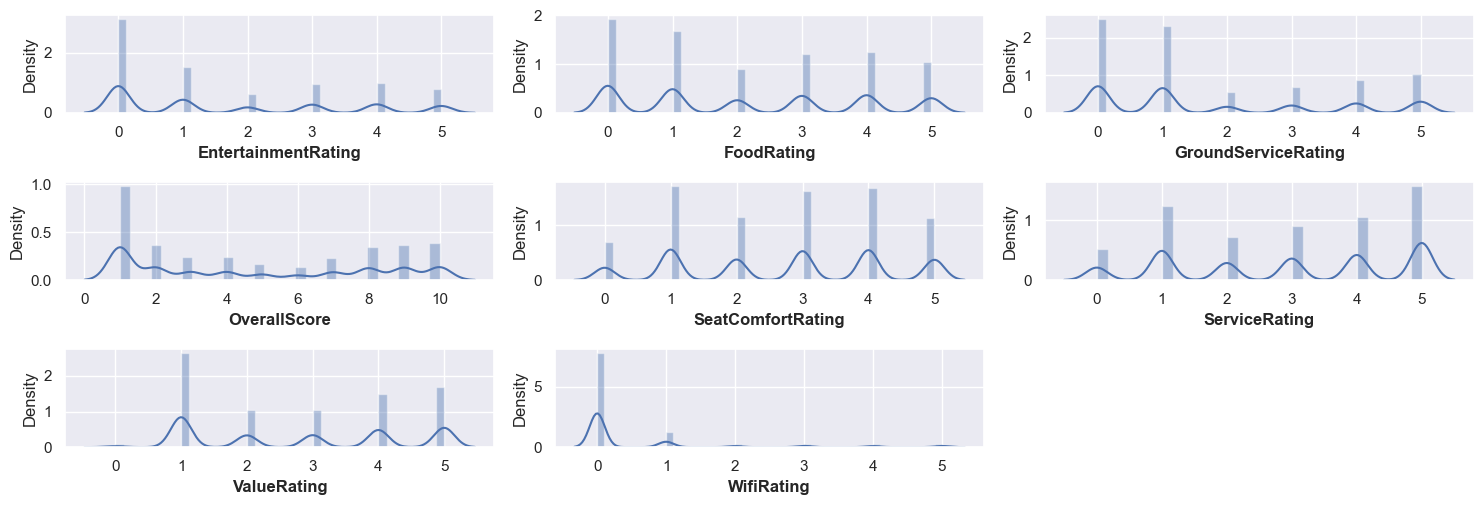

In [17]:
# check the distribution of numerical data

try:
    plt.figure(figsize=(15, 100))
    for i,col in enumerate(numerical_features[0:8]):
        plt.subplot(60,3,i+1)
        sns.distplot(x=data[col])
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
except Exception as e:
    print(e)  

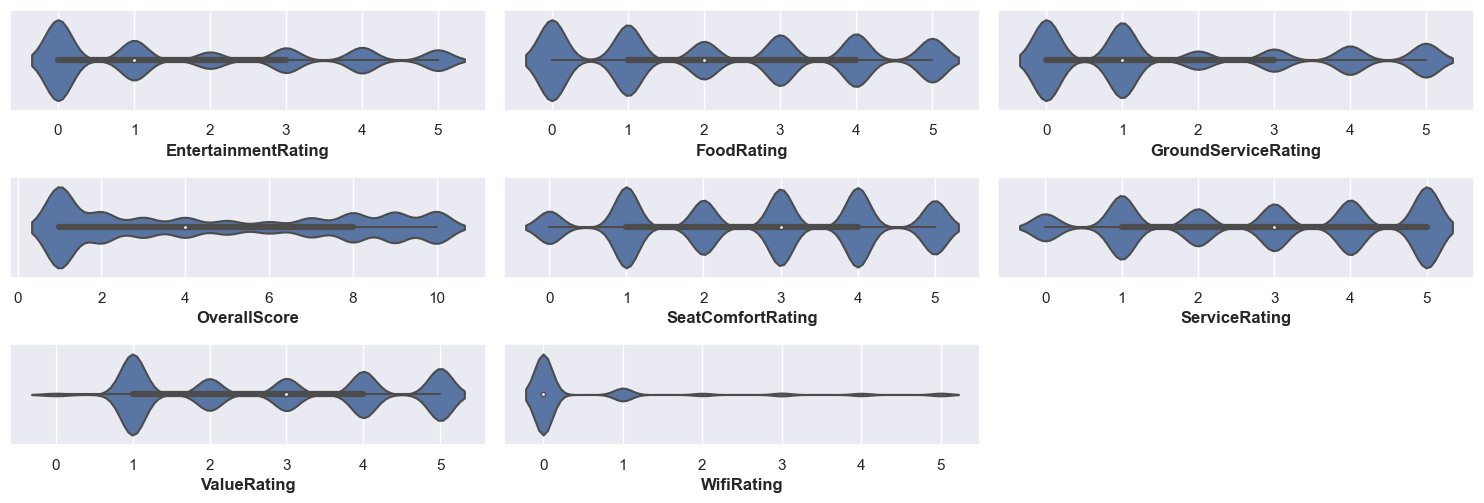

In [18]:
# check the violinplot of numerical data

try:
    plt.figure(figsize=(15, 100))
    for i,col in enumerate(numerical_features[0:8]):
        plt.subplot(60,3,i+1)
        sns.violinplot(x=data[col])
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
except Exception as e:
    print(e)  

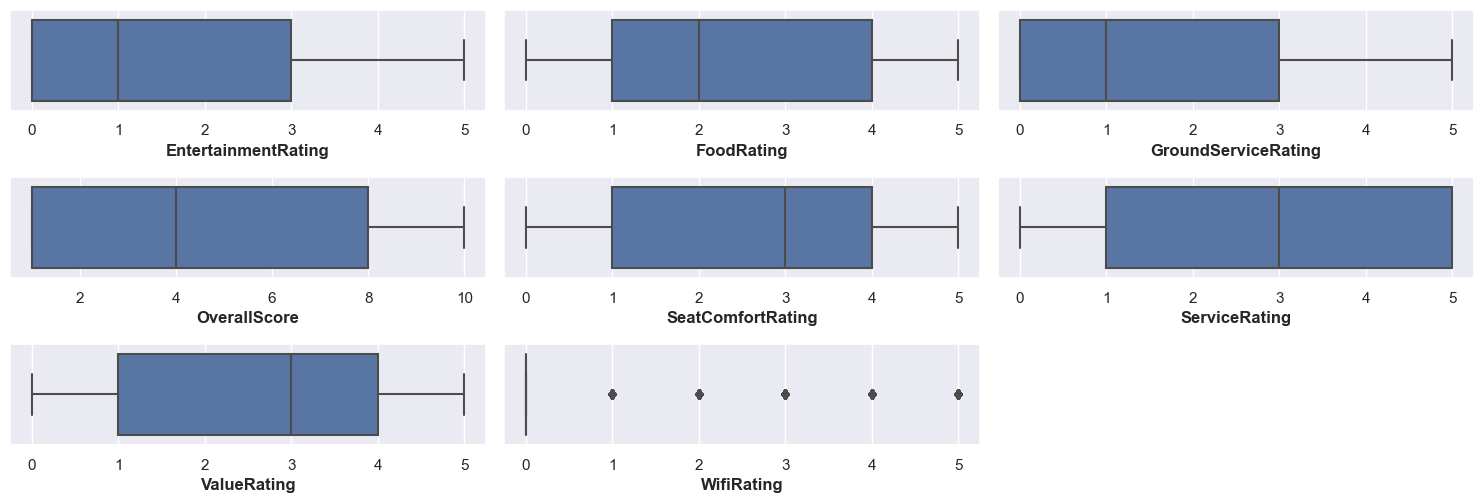

In [19]:
# check the boxplot of numerical data

try:
    plt.figure(figsize=(15, 100))
    for i,col in enumerate(numerical_features[0:8]):
        plt.subplot(60,3,i+1)
        sns.boxplot(x=data[col])
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
except Exception as e:
    print(e)  

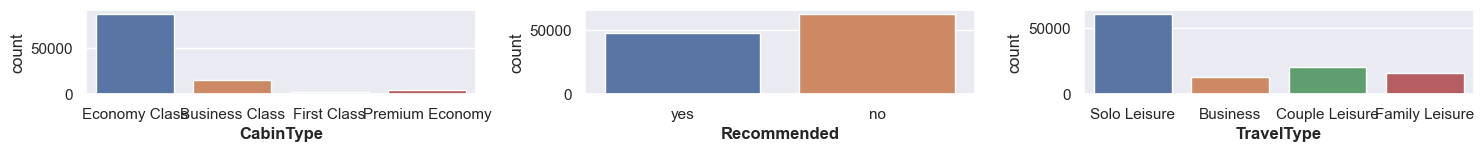

In [20]:
# create the count plot of catogotical data
try:
    plt.figure(figsize=(15, 90))
    for i,col in enumerate(catigorical_features[0:3]):
        plt.subplot(60,3,i+1)
        sns.countplot(x=data[col])
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
except Exception as e:
    print(e)  

<Axes: xlabel='CabinType', ylabel='OverallScore'>

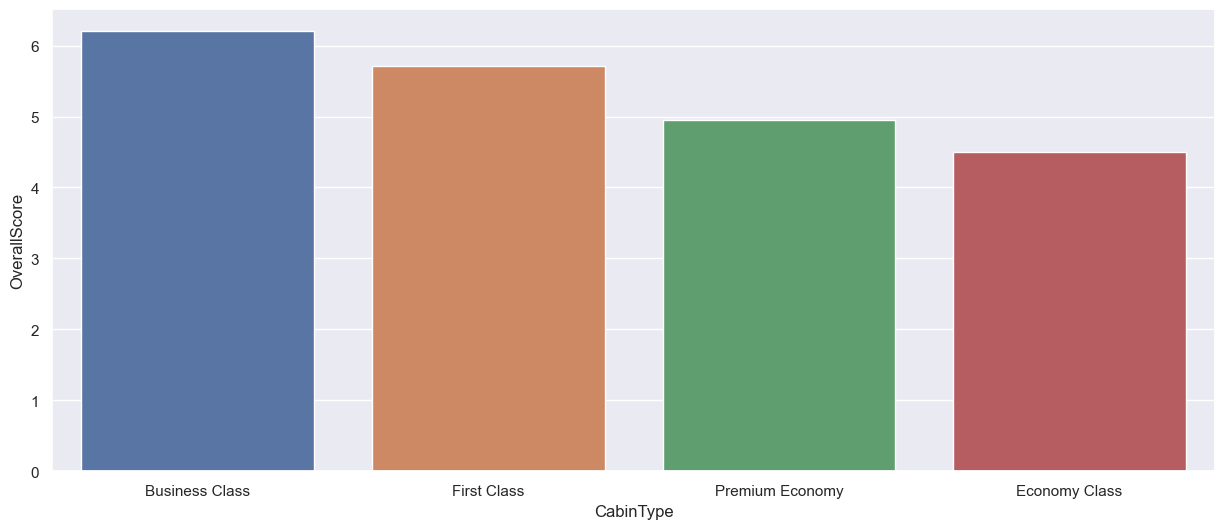

In [21]:
CabinType = data.groupby("CabinType")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="CabinType",y="OverallScore",data = CabinType)

<Axes: xlabel='TravelType', ylabel='OverallScore'>

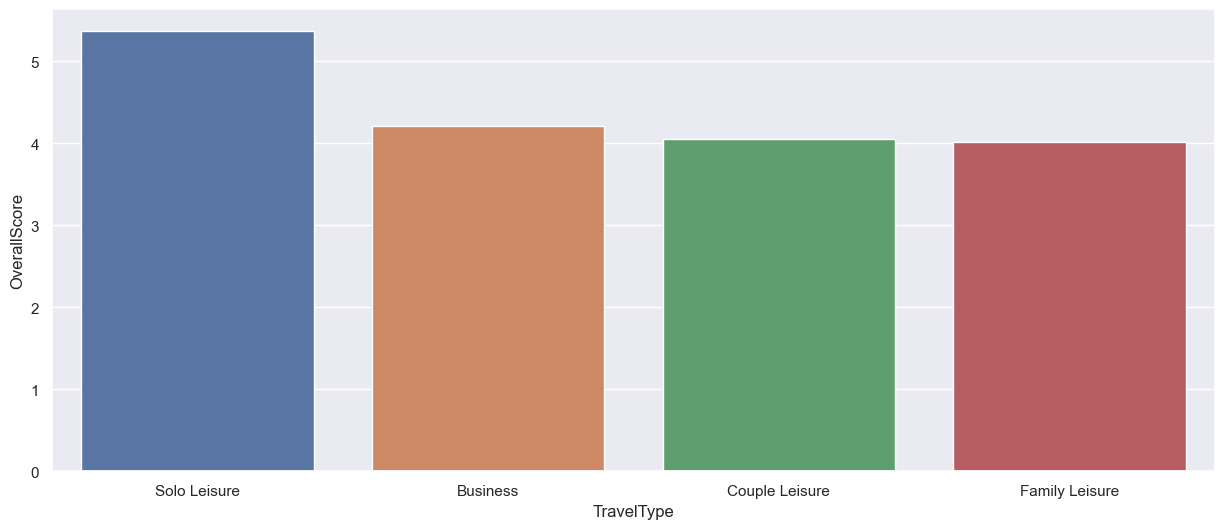

In [22]:
TravelType = data.groupby("TravelType")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="TravelType",y="OverallScore",data = TravelType)

<Axes: xlabel='Recommended', ylabel='OverallScore'>

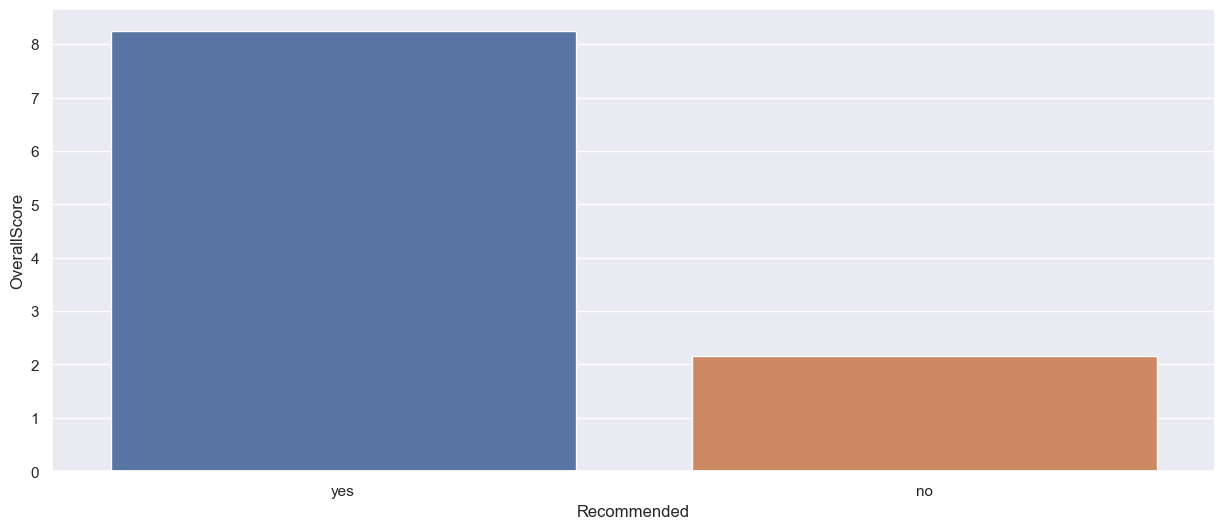

In [23]:
Recommended = data.groupby("Recommended")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="Recommended",y="OverallScore",data = Recommended)

<Axes: xlabel='EntertainmentRating', ylabel='OverallScore'>

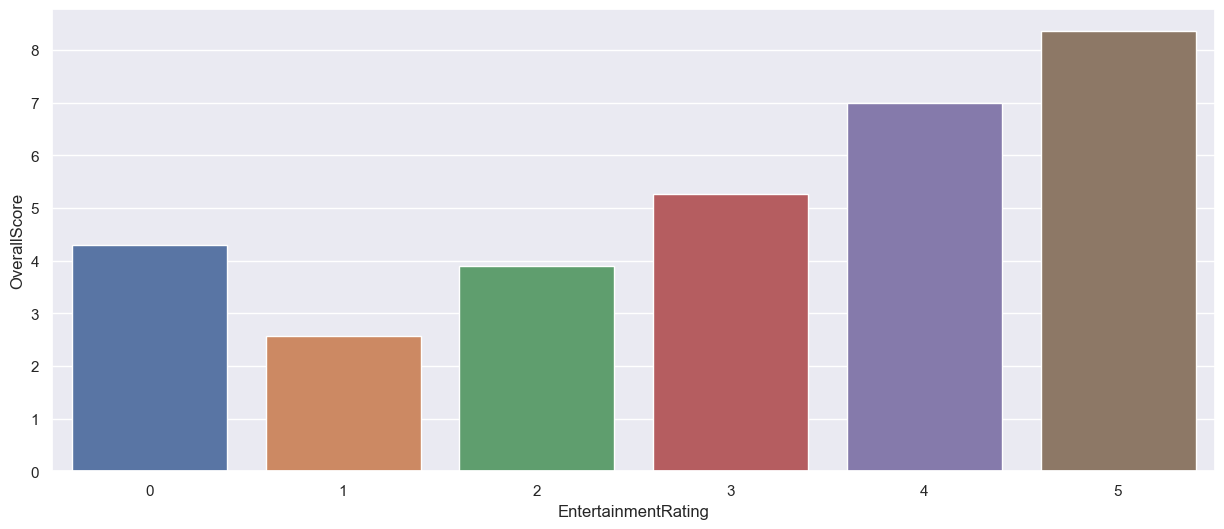

In [24]:
EntertainmentRating = data.groupby("EntertainmentRating")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="EntertainmentRating",y="OverallScore",data = EntertainmentRating)

<Axes: xlabel='FoodRating', ylabel='OverallScore'>

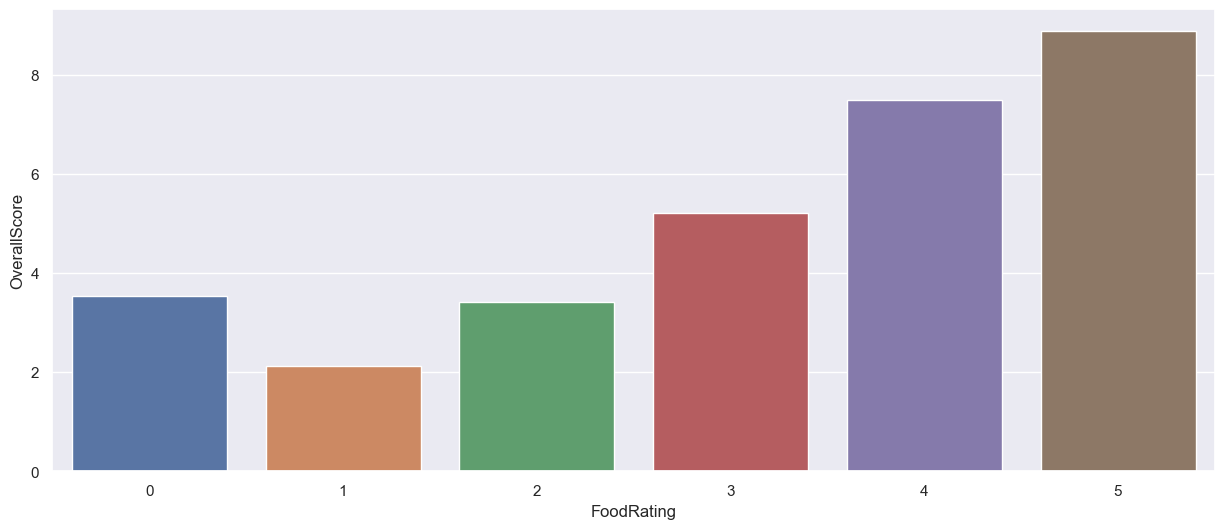

In [25]:
FoodRating = data.groupby("FoodRating")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="FoodRating",y="OverallScore",data = FoodRating)

<Axes: xlabel='GroundServiceRating', ylabel='OverallScore'>

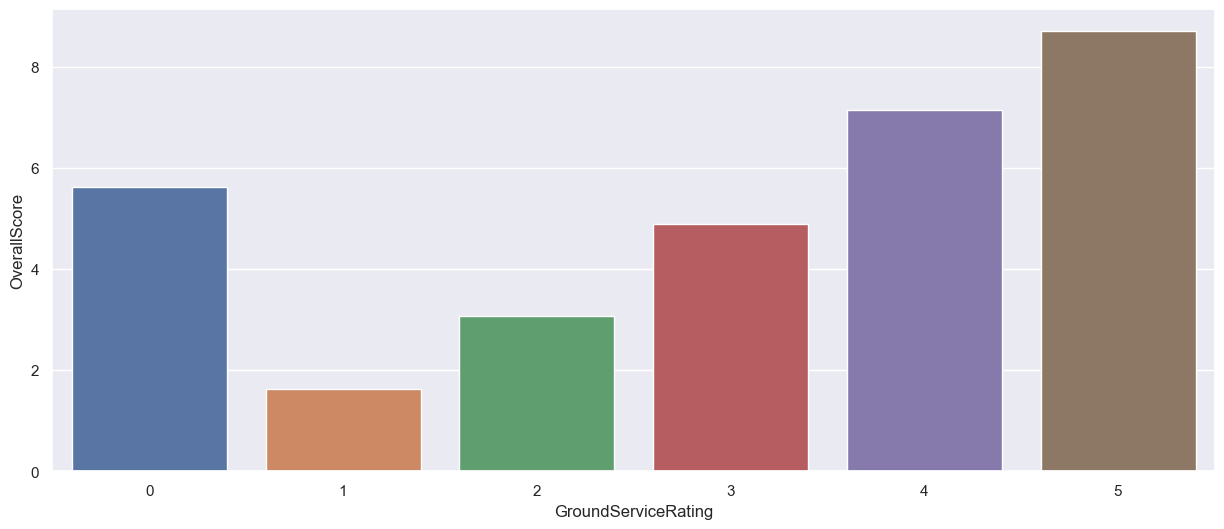

In [26]:
GroundServiceRating = data.groupby("GroundServiceRating")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="GroundServiceRating",y="OverallScore",data = GroundServiceRating)

<Axes: xlabel='SeatComfortRating', ylabel='OverallScore'>

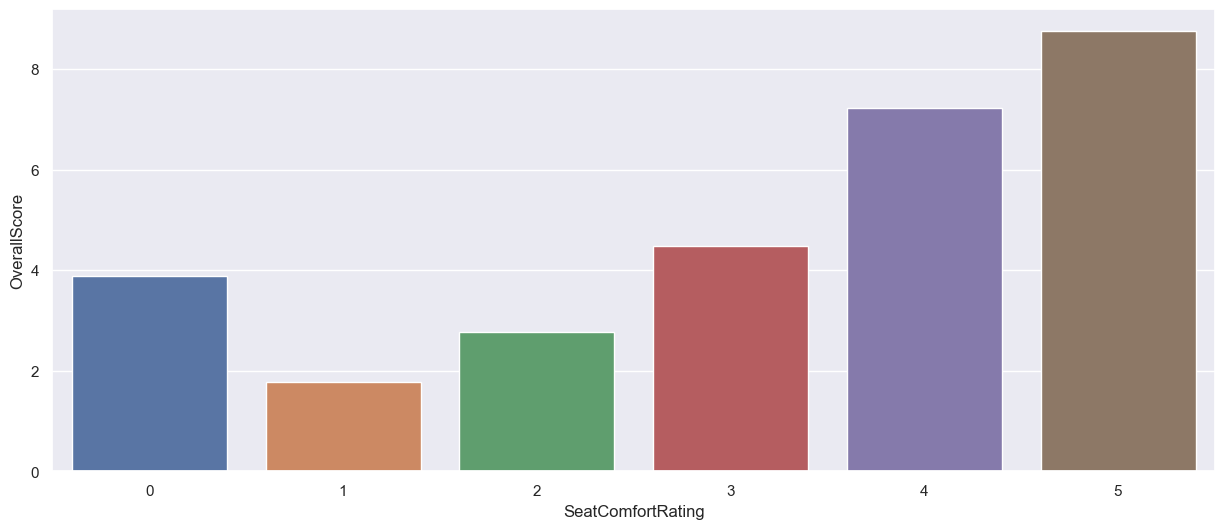

In [27]:
SeatComfortRating = data.groupby("SeatComfortRating")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="SeatComfortRating",y="OverallScore",data = SeatComfortRating)

<Axes: xlabel='ServiceRating', ylabel='OverallScore'>

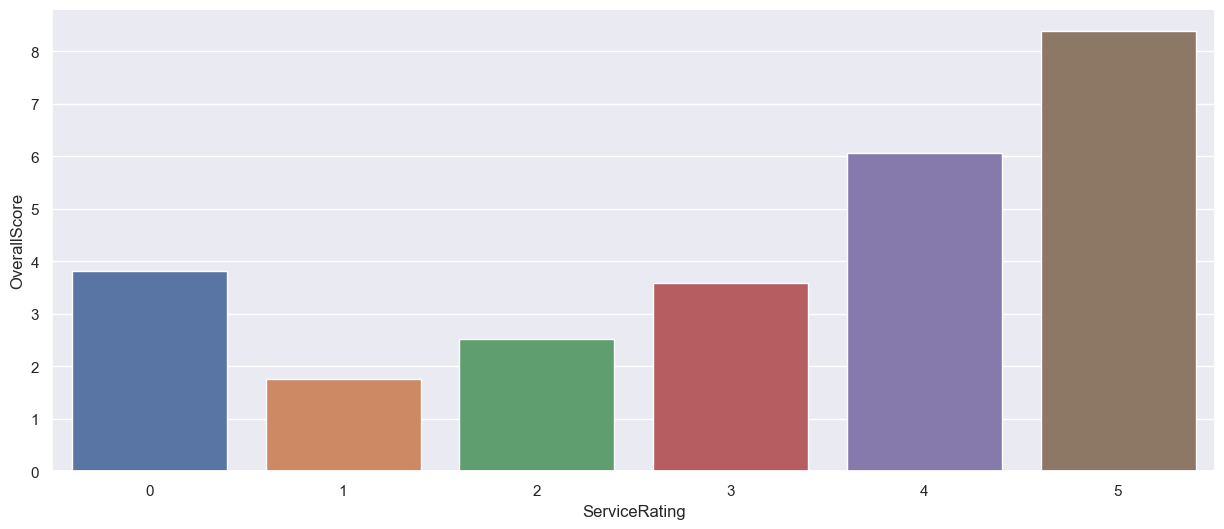

In [28]:
ServiceRating = data.groupby("ServiceRating")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="ServiceRating",y="OverallScore",data = ServiceRating)

<Axes: xlabel='ValueRating', ylabel='OverallScore'>

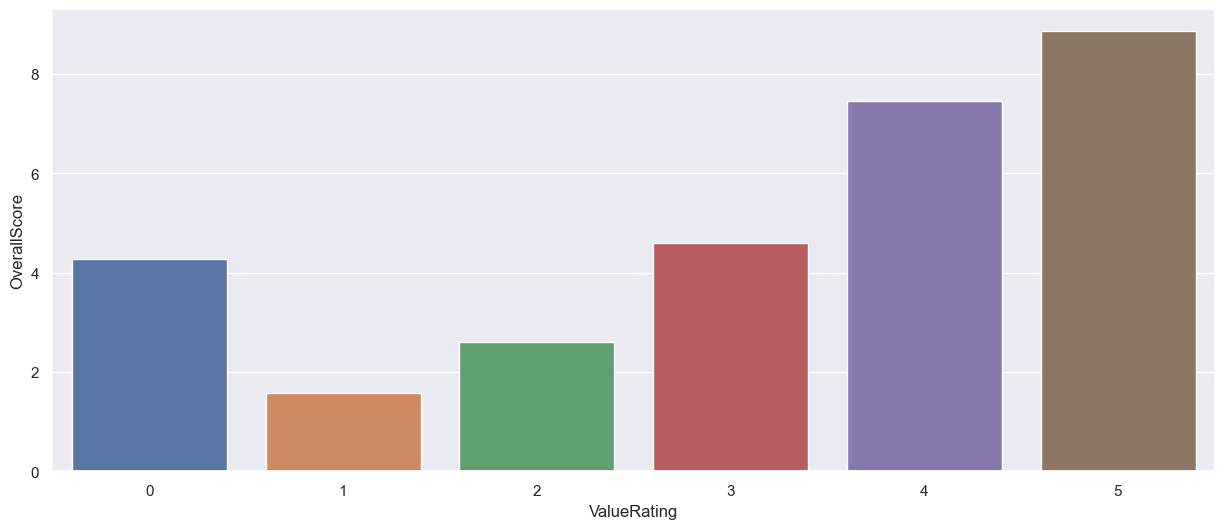

In [29]:
ValueRating = data.groupby("ValueRating")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="ValueRating",y="OverallScore",data = ValueRating)

<Axes: xlabel='WifiRating', ylabel='OverallScore'>

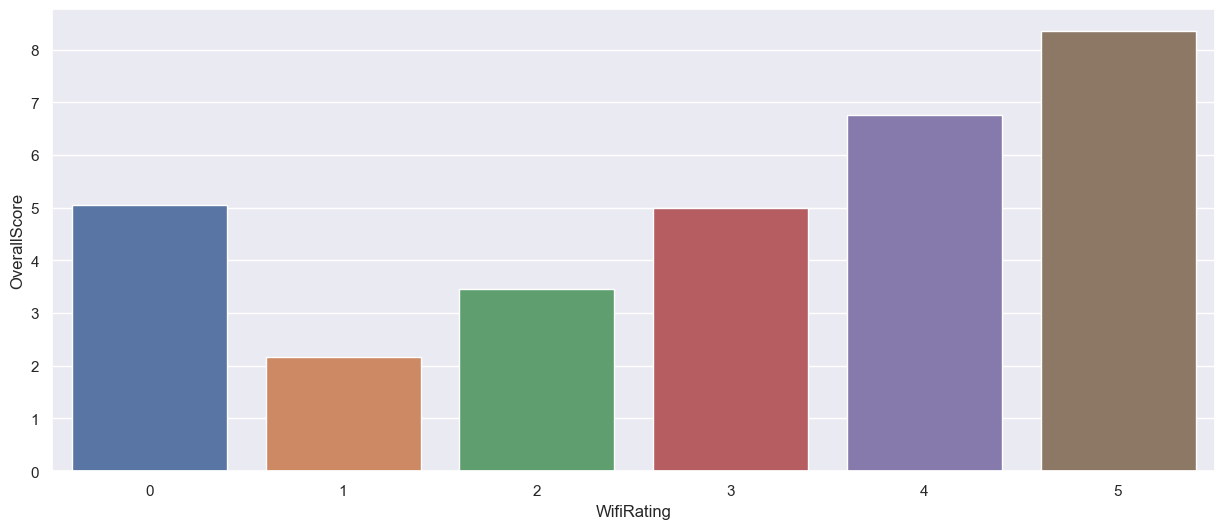

In [30]:
WifiRating = data.groupby("WifiRating")["OverallScore"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="WifiRating",y="OverallScore",data = WifiRating)

In [31]:
# giving value different location
data["OverallRatings"] = data["OverallScore"]
data.drop("OverallScore",axis=1,inplace=True)

In [32]:
data["CabinType"].unique()

array(['Economy Class', 'Business Class', 'First Class',
       'Premium Economy'], dtype=object)

In [33]:
# convert and apply ordinal encoding on this data because present ranking
data["CabinType"] = data["CabinType"].map({'Economy Class':0, 'Business Class':3, 'First Class':2,'Premium Economy':1})

In [34]:
# apply lable encoding on this tow features
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()
cato = ["TravelType","Recommended"]
for i in cato:
    lable.fit(data[i])
    data[i] = lable.fit_transform(data[i])

<Axes: >

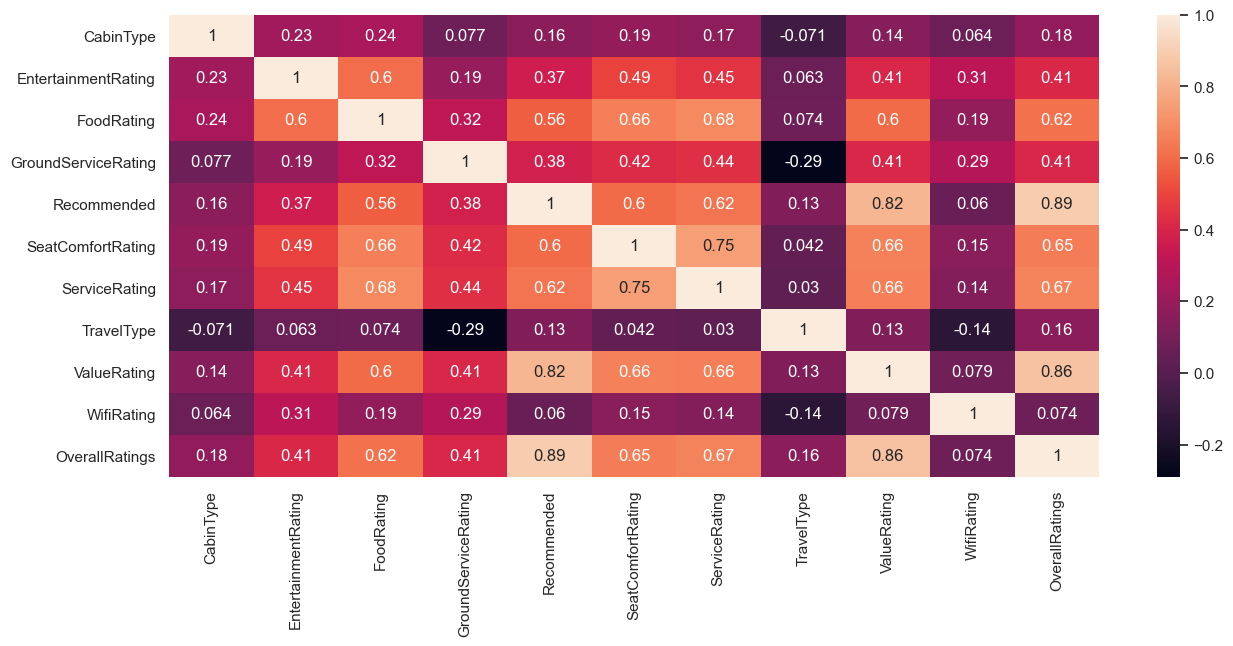

In [35]:
sns.heatmap(data.corr(),annot=True)

# Model Traning

In [36]:
data

,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,Recommended,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating,OverallRatings
0,0,0,4,4,1,4,5,3,3,0,9.0
1,0,0,1,1,0,2,2,3,2,0,1.0
2,0,0,1,1,0,2,1,3,2,0,1.0
3,0,0,0,0,1,0,0,3,4,0,8.0
4,0,0,0,0,0,0,0,3,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
129447,0,0,0,0,0,0,0,3,4,0,6.0
129449,0,0,0,0,1,0,0,3,4,0,10.0
129451,0,0,0,0,1,0,0,3,4,0,8.0
129452,0,0,0,0,0,0,0,3,1,0,4.0


In [37]:
data.shape

(110408, 11)

In [38]:
# sagrigate independance and dependance features 
x = data.drop("OverallRatings",axis=1)
y = data["OverallRatings"]

In [39]:
# saprate catigorical and numerical data 
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['CabinType', 'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'Recommended', 'SeatComfortRating', 'ServiceRating', 'TravelType',
       'ValueRating', 'WifiRating'],
      dtype='object')


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [41]:
# numeric Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler()),
    ]
)

# Create preprocessor Object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [42]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88326, 10)
(22082, 10)
(88326,)
(22082,)


In [44]:
# apply preprocessing object
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [46]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [47]:
# Define models and their hyperparameters for Random Search
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10]
        }
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10]
        }
    },
    "Elastic Net": {
        "model": ElasticNet(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10],
            "l1_ratio": [0.2, 0.4, 0.6, 0.8]
        }
    },
    "Decision Tree Regressor": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":['best','random'],
            "max_depth": [8,15,20,25],
            "min_samples_split": [8,10,5],
            "min_samples_leaf": [5,8],
            "max_features":["auto","sqrt","log2"]
        }
    },
    "RandomForestRegressor":{
        "model":RandomForestRegressor(n_estimators=400,max_depth=30,min_samples_split=5,min_samples_leaf=4),
        "params":{
        }
    },
    "AdaBoostRegressor": {
        "model": AdaBoostRegressor(),
        "params": {
            'n_estimators': [200,300],
            "loss":["linear", "square", "exponential"],
            "learning_rate":[1,0.1,0.01,0.001],
        }
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(),
        "params": {
            'n_estimators': [400,500],
            "learning_rate":[0.1],
        }
    },
    "KNeighborsRegressor": {
        "model": KNeighborsRegressor(algorithm="ball_tree"),
        "params": {
            "n_neighbors":[8,10,12]
            
        },
    }
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

# Train and evaluate models using GridSearchCV
for model_name, model_params in models.items():
    model = model_params["model"]
    params = model_params["params"]
    randomcv = RandomizedSearchCV(model, params, cv=3)
    randomcv.fit(X_train, y_train)
    score = randomcv.score(X_train, y_train)
    y_pred = randomcv.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {randomcv.best_params_}")
    print(f"MSE:{mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R-squared: {r2_score(y_test, y_pred)}\n")
    
    r2_list.append(r2_score)
    y_predict_list.append(y_pred)
    trainig_score.append(score)

Model: Linear Regression
Best Parameters: {}
MSE:1.6832520600354943
MAE: 0.9737172953937301
RMSE: 1.297402042558703
R-squared: 0.8526349899571571

Model: Lasso
Best Parameters: {'alpha': 0.01}
MSE:1.6832363122540148
MAE: 0.9755033872360251
RMSE: 1.2973959735770784
R-squared: 0.852636368640737

Model: Ridge
Best Parameters: {'alpha': 10}
MSE:1.68324880698518
MAE: 0.9737337199434046
RMSE: 1.297400788879512
R-squared: 0.8526352747545465

Model: Elastic Net
Best Parameters: {'l1_ratio': 0.4, 'alpha': 0.01}
MSE:1.6830996542159768
MAE: 0.9752872599137044
RMSE: 1.2973433062285313
R-squared: 0.8526483327509413

Model: Decision Tree Regressor
Best Parameters: {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'squared_error'}
MSE:1.2787682872689972
MAE: 0.8207862315215808
RMSE: 1.1308263736175403
R-squared: 0.8880466532790752

Model: RandomForestRegressor
Best Parameters: {}
MSE:1.2482194506135136
MAE: 0.8030130588104706
RMSE

In [48]:
trainig_score

[0.8540310827077101,
 0.853976601369209,
 0.854031077073681,
 0.8540060938258622,
 0.8934522399499696,
 0.9194519271949882,
 0.8600031413942167,
 0.8988251834740191,
 0.901400486825273]

In [56]:
data.to_csv("arlinereviews_clean.csv",index=False)